# 1.概念

[SDF](./complement/SDF.ipynb) (Structure Data File)是常见的化学数据文件，[SMILES](./complement/SMILES.ipynb) (Simplified Molecular Input Line Entry Specification)是一种用ASCII字符串明确描述分子结构的规范。它们被广泛应用于计算化学，化学信息学等领域

# 2.将SMILES转化为SDF文件

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [2]:
smiles = 'NC(C)C(=O)O'
# 丙氨酸smiles编码
mol = AllChem.AddHs(Chem.MolFromSmiles(smiles))
# MolFromSmiles模块从smiles编码中获取结构信息，AddHs用于生成（或优化）3D几何时，将氢原子加入分子中
AllChem.EmbedMolecule(mol)
# EmbedMolecule模块将二维分子图转化为三维分子坐标
AllChem.MMFFOptimizeMolecule(mol)
# MMFFOptimizeMolecule模块对分子结构进行简单优化
print(Chem.MolToMolBlock(mol))
# Chem.MolToMolFile(mol,'./data/NC(C)C(=O)O.sdf')


     RDKit          3D

 13 12  0  0  0  0  0  0  0  0999 V2000
   -0.6087    1.5835   -0.2603 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2817    0.1514   -0.4458 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2153   -0.6902    0.4132 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1832   -0.1088   -0.0797 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.9915    0.7219    0.3084 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5584   -1.3905   -0.2582 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4281    1.8301    0.7153 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.0760    2.1335   -0.7845 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4127   -0.0916   -1.5057 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0624   -0.4959    1.4811 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.2645   -0.4850    0.1742 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0414   -1.7591    0.2484 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.5058   -1.3992   -0.0064 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0

# 3.将SDF文件转化为SMILES

SDF文件中有比SMILES更丰富的结构信息，如果将SDF文件转化为SMILES必然会引起信息的损失，因此一般我们只有希望提升存储效率等情况下需要用到这一转化。

In [2]:
mol = Chem.MolFromMolFile('./data/CCNC(C)=O.sdf')
# mol = Chem.MolFromMolFile('./data/1072-48-6.mol')
# mol = Chem.MolFromMolFile('./data/ferrocene.sdf', sanitize = False)
# 用MolFromMolFile这一模块将SDF文件中存储的分子信息转变为RDKit中的Mol对象
smile = Chem.MolToSmiles(mol)
print(smile)

O=C1CC=NO1


如果分子结构中包含一些不常见成键信息（比如分子中碳原子成了5根键）时，会导致代码报错，这时我们需要将MolFromMolFile中的sanitize参数设置为False，这样RDKit在读取分子文件时就会跳过对成键信息的验证。

# 4.根据SMILES绘制分子图

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

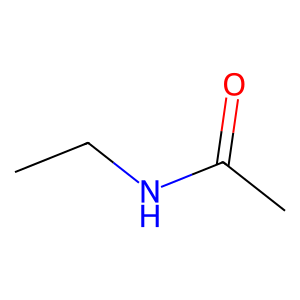

In [4]:
# smiles = 'NC(C)C(=O)O'
# smiles = 'CC(=O)C(O)=O'
smiles = 'CCNC(C)=O'
# smiles = ''C[C@H](O)c1ccccc1'
mol = Chem.MolFromSmiles(smiles)
Draw.MolToImage(mol, subImgSize=(150, 150), legends=[smiles])

# 5.应用

求化合物分子结构之间的相似性

[相似性rdkit](./Chemical_similarity_calculate.ipynb)

# 参考资料

[Chemical table file - Wikipedia](https://en.wikipedia.org/wiki/Chemical_table_file#SDF)

[【3.1.2】SDF - Sam' Note (qinqianshan.com)](https://qinqianshan.com/biology/chemical/file-sdf/)

[RDKit|一站式搞定分子读取、输出、可视化 - 简书 (jianshu.com)](https://www.jianshu.com/p/c0df2942d8d1)                                  